In [38]:
#!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv

In [59]:
import pandas as pd
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [40]:
fies2020 = pd.read_csv('./dadosLimpos2020.csv', encoding="UTF-8")

In [41]:
def testeH0(amostra1, amostra2, typeH0='<'):
  # diferença das medias
  diff_media = amostra1.mean() - amostra2.mean()
  print(f"A difereça das medias é de {diff_media}")

  # erro padrão da diferença
  errPDD =  math.sqrt(((amostra1.std() ** 2 / amostra1.size) + (amostra2.std() ** 2 / amostra2.size)))
  print(f"O erro padrão da difereça é de {errPDD}")

  # Quantidade de erros padrões que a diferença das medias está
  err_diff = diff_media/ errPDD

  print(f"A diferença das medias está a {err_diff} erros padrões da diferença")

  if (typeH0 == '<'):
    p_value = 1 - norm.cdf(err_diff)        # Teste unilateral pela direita
  elif (typeH0 == '>'):
    p_value = norm.cdf(err_diff)            # Teste unilateral pela esquerda
  elif (typeH0 == '='):
    p_value = (1 - norm.cdf(abs(err_diff))) * 2  # Teste bilateral 
  else:
    return
  print(f"Assim temos um valor p de  {p_value :.2f}")
  print(f"A probabilidade de encontrar este resultado é de {p_value * 100 :.2f}%")

### Hipóteses Media Enem

* Ho Mulheres tem uma média no enem maior do que os homens
* Ha Mulheres tem uma média no enem menor do que os homens

In [50]:
fies2020_F_Media_Enem = fies2020[fies2020['Sexo'] == 'F']["Média nota Enem"]
fies2020_M_Media_Enem = fies2020[fies2020['Sexo'] == 'M']["Média nota Enem"]

In [51]:
testeH0(fies2020_F_Media_Enem, fies2020_M_Media_Enem, '>')

A difereça das medias é de -2.5792827829759517
O erro padrão da difereça é de 0.36791047324566395
A diferença das medias está a -7.01062614559954 erros padrões da diferença
Assim temos um valor p de  0.00
A probabilidade de encontrar este resultado é de 0.00%


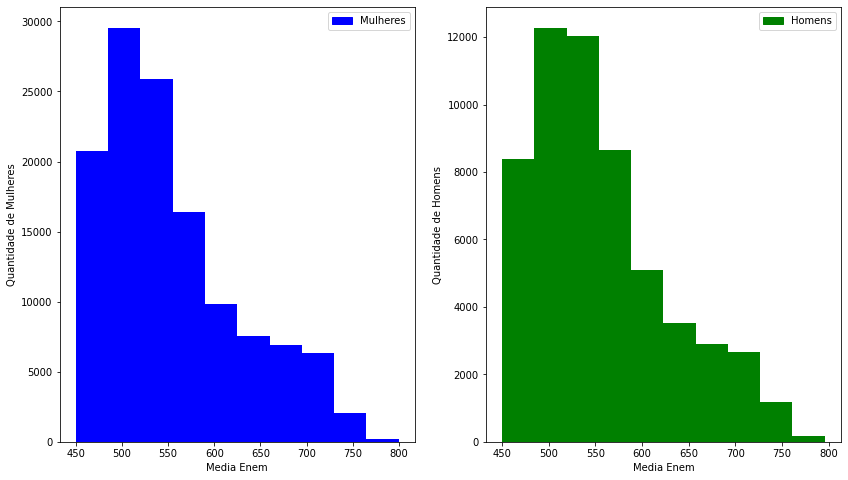

In [52]:
plt.figure(figsize=(14, 8))
#Mulheres
plt.subplot(1, 2, 1)

plt.hist(fies2020_F_Media_Enem, color='blue')
blue_patch = mpatches.Patch(color='blue', label='Mulheres')
plt.legend(handles=[ blue_patch])
plt.xlabel("Media Enem")
plt.ylabel("Quantidade de Mulheres")
#Homens
plt.subplot(1, 2, 2)

green_patch = mpatches.Patch(color='green', label='Homens')
plt.hist(fies2020_M_Media_Enem,  color='green')
plt.legend(handles=[ green_patch])
plt.xlabel("Media Enem")
plt.ylabel("Quantidade de Homens")
plt.show()

### Hipóteses Media Enem

* Ho Mulheres tem uma nota na redação menor do que os homens
* Ha Mulheres tem uma nota na redação maior do que os homens

In [53]:
fies2020_F = fies2020[fies2020['Sexo'] == 'F']["Redação"]
fies2020_M = fies2020[fies2020['Sexo'] == 'M']["Redação"]

In [54]:
testeH0(fies2020_F, fies2020_M, '<')

A difereça das medias é de 30.978477529765655
O erro padrão da difereça é de 0.7526445462232632
A diferença das medias está a 41.159505752369135 erros padrões da diferença
Assim temos um valor p de  0.00
A probabilidade de encontrar este resultado é de 0.00%


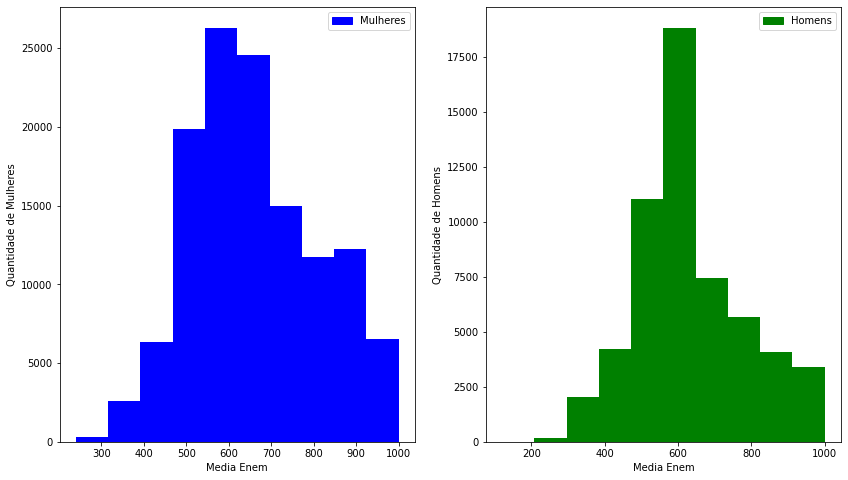

In [55]:
plt.figure(figsize=(14, 8))

#Mulheres
plt.subplot(1, 2, 1)

plt.hist(fies2020_F, color='blue')
blue_patch = mpatches.Patch(color='blue', label='Mulheres')
plt.legend(handles=[ blue_patch])
plt.xlabel("Media Enem")
plt.ylabel("Quantidade de Mulheres")
#Homens
plt.subplot(1, 2, 2)

green_patch = mpatches.Patch(color='green', label='Homens')
plt.hist(fies2020_M,  color='green')
plt.legend(handles=[ green_patch])
plt.xlabel("Media Enem")
plt.ylabel("Quantidade de Homens")
plt.show()

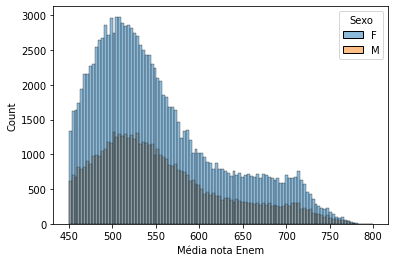

In [66]:
g = sns.histplot(x="Média nota Enem", hue = 'Sexo', data=fies2020)


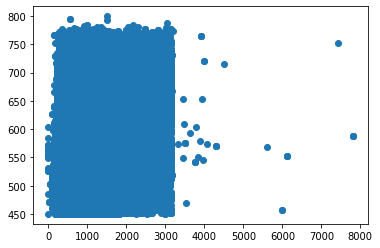

In [58]:
plt.scatter(fies2020["Renda mensal bruta per capita"], fies2020["Média nota Enem"])

In [56]:
fies2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182425 entries, 0 to 182424
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID do estudante                 182425 non-null  int64  
 1   Sexo                            182425 non-null  object 
 2   Data de Nascimento              182425 non-null  object 
 3   UF de residência                182425 non-null  object 
 4   Etnia/Cor                       182425 non-null  object 
 5   Pessoa com deficiência?         182425 non-null  object 
 6   Ano conclusão ensino médio      182425 non-null  int64  
 7   Concluiu curso superior?        182425 non-null  object 
 8   Nº de membros Grupo Familiar    182425 non-null  int64  
 9   Renda familiar mensal bruta     182425 non-null  float64
 10  Renda mensal bruta per capita   182425 non-null  float64
 11  UF                              182425 non-null  object 
 12  Área do conhecim